In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# PARTIE 1

## test de nouveau package

In [ ]:
from pivottablejs import pivot_ui

In [2]:
base = pd.read_excel("Dossier_2023.xls") # Import d'un fichier excel + onglet spécifique

base.head(2)

In [ ]:
pivot_ui(base)

## Fint du test 

# PARTIE 2

## Model Pour connaitre qui survivre sur la nauffrace de titanic (extraction de la base titanic)

In [2]:
titanic = sns.load_dataset('titanic')

In [11]:
titanic.shape

(182, 15)

In [15]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


In [5]:
titanic = titanic[['survived','pclass','sex','age']]

In [10]:
titanic.dropna(axis=0,inplace=True)

In [8]:
titanic['sex'].replace(['male','female'],[0,1],inplace=True)

In [27]:
#titanic.pclass.value_counts()

1    157
2     15
3     10
Name: pclass, dtype: int64

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
model = KNeighborsClassifier()

In [15]:
X = titanic.drop('survived', axis=1)  # Caractéristiques autres que la survived
y = titanic['survived']

In [16]:
model.fit(X,y)

KNeighborsClassifier()

In [17]:
model.score(X,y)

0.8417366946778712

In [21]:
def survie(model, pclass=3, sex=0, age=26):
    x = np.array([pclass,sex,age]).reshape(1,3)
    print(model.predict(x))
    print(model.predict_proba(x))

In [22]:
survie(model)

[0]
[[0.8 0.2]]


C:\Users\Diop\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Diop\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# PARTIE 3 Selection de modéle

In [26]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [28]:
print(X.shape)

(150, 4)


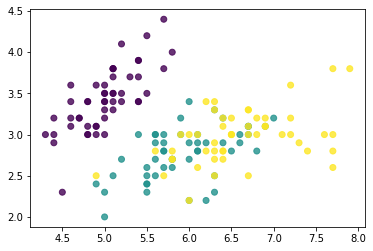

In [30]:
plt.scatter(X[:,0] ,X[:,1], c=y, alpha=0.8)

### train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [33]:
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (120, 4)
Test set: (30, 4)


Text(0.5, 1.0, 'Test set')

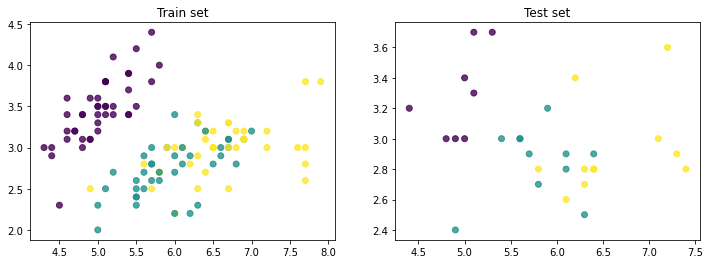

In [34]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1],c=y_test, alpha=0.8)
plt.title('Test set')

In [38]:
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train, y_train)

print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))
     

train score: 1.0
test score: 0.9


### Validation set et Cross Validation

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
model = KNeighborsClassifier()
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

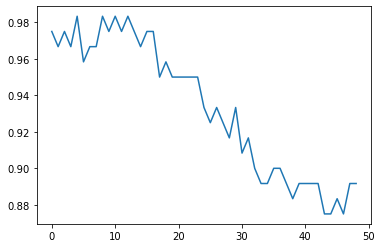

In [42]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

### Validation curve

In [57]:
from sklearn.model_selection import validation_curve

In [58]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, X_train, y_train,
                                          'n_neighbors', k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()


TypeError: validation_curve() takes 3 positional arguments but 5 positional arguments (and 1 keyword-only argument) were given

### GridSearchCV

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [49]:
print(grid.best_score_)
print(grid.best_params_)

0.9833333333333334
{'metric': 'euclidean', 'n_neighbors': 5}


In [50]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.9333333333333333

### confusion matrix

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]], dtype=int64)

### Learning Curve

In [53]:
from sklearn.model_selection import learning_curve

[ 9 19 28 38 48 57 67 76 86 96]


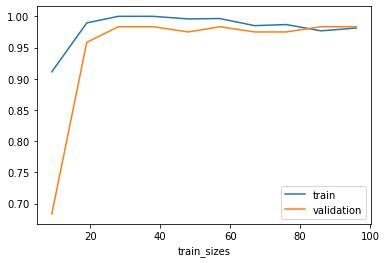

In [54]:
N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

In [ ]:

#base1 = base1.drop('Satisfaction_Client2', axis=1) 
#base1['Sexe'].replace(['H','F'],[0,1],inplace=True)
#base1['Epargne_retraite'].replace(['non','oui'],[0,1],inplace=True)
#base1['Risque_de_defaut'] = base1['Risque_de_defaut'].str.strip()  # Nettoyer les espaces autour des valeurs
#base1['Risque_de_defaut'].replace({'oui': 0, 'non': 1}, inplace=True)
#base1['Livret_A'].replace(['non','oui'],[0,1],inplace=True)
#base1['Type_produit'].replace(['A','B','C'],[1,2,3],inplace=True)
#base1['Sentiment'].replace(['Positive','Negative','Neutral'],[1,2,3],inplace=True)
#base1.to_csv("dossier_banque.csv",sep = ";",index=False) # Export vers une fichier Excel